<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.059377,48.727031,96.274933,34.842116,-549.470139,-299.566682,424.538849,-724.105532
1,0.0,1.0,92.192983,92.957937,30.030739,21.133099,1774.190564,2020.505322,504.345626,1516.159696
2,0.0,2.0,22.181556,68.359403,43.377115,28.091392,676.443187,848.452652,407.147752,441.304900
3,0.0,3.0,56.312730,37.303204,72.723964,95.557048,-164.837656,107.059290,44.642955,62.416335
4,0.0,4.0,53.536208,28.079216,23.295870,26.595073,34.707980,176.214346,340.007181,-163.792835
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.315744,63.413937,49.933012,37.100095,-684.234107,-462.471319,130.243188,-592.714507
119996,999.0,116.0,82.206475,78.373830,51.264939,51.826452,-281.427247,-7.755551,177.999541,-185.755093
119997,999.0,117.0,55.968471,99.910293,83.335534,27.814220,-9.313237,267.715282,99.635971,168.079310
119998,999.0,118.0,85.286991,45.154227,46.842355,89.403538,-191.943869,84.743241,242.434259,-157.691018


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.059377,48.727031,96.274933,34.842116,-549.470139,-299.566682,424.538849,-724.105532
1,0.0,1.0,92.192983,92.957937,30.030739,21.133099,1774.190564,2020.505322,504.345626,1516.159696
2,0.0,2.0,22.181556,68.359403,43.377115,28.091392,676.443187,848.452652,407.147752,441.304900
3,0.0,3.0,56.312730,37.303204,72.723964,95.557048,-164.837656,107.059290,44.642955,62.416335
4,0.0,4.0,53.536208,28.079216,23.295870,26.595073,34.707980,176.214346,340.007181,-163.792835
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.315744,63.413937,49.933012,37.100095,-684.234107,-462.471319,130.243188,-592.714507
119996,999.0,116.0,82.206475,78.373830,51.264939,51.826452,-281.427247,-7.755551,177.999541,-185.755093
119997,999.0,117.0,55.968471,99.910293,83.335534,27.814220,-9.313237,267.715282,99.635971,168.079310
119998,999.0,118.0,85.286991,45.154227,46.842355,89.403538,-191.943869,84.743241,242.434259,-157.691018


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    60.059377  48.727031  96.274933  34.842116  -549.470139   
      1.0    92.192983  92.957937  30.030739  21.133099  1774.190564   
      2.0    22.181556  68.359403  43.377115  28.091392   676.443187   
      3.0    56.312730  37.303204  72.723964  95.557048  -164.837656   
      4.0    53.536208  28.079216  23.295870  26.595073    34.707980   
...                ...        ...        ...        ...          ...   
999.0 115.0  61.315744  63.413937  49.933012  37.100095  -684.234107   
      116.0  82.206475  78.373830  51.264939  51.826452  -281.427247   
      117.0  55.968471  99.910293  83.335534  27.814220    -9.313237   
      118.0  85.286991  45.154227  46.842355  89.403538  -191.943869   
      119.0  80.618337  26.479741  46.619508  21.955669   305.527526   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -299.566682  424.538849  -724.105532  
      1.0    2020.505322  504.345626  1516.159696  
      2.0     848.452652  407.147752   441.304900  
      3.0     107.059290   44.642955    62.416335  
      4.0     176.214346  340.007181  -163.792835  
...                  ...         ...          ...  
999.0 115.0  -462.471319  130.243188  -592.714507  
      116.0    -7.755551  177.999541  -185.755093  
      117.0   267.715282   99.635971   168.079310  
      118.0    84.743241  242.434259  -157.691018  
      119.0   491.200781  344.734740   146.466041  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    60.059377  48.727031  96.274933  34.842116  -549.470139   
      1.0    92.192983  92.957937  30.030739  21.133099  1774.190564   
      2.0    22.181556  68.359403  43.377115  28.091392   676.443187   
      3.0    56.312730  37.303204  72.723964  95.557048  -164.837656   
      4.0    53.536208  28.079216  23.295870  26.595073    34.707980   
...                ...        ...        ...        ...          ...   
999.0 115.0  61.315744  63.413937  49.933012  37.100095  -684.234107   
      116.0  82.206475  78.373830  51.264939  51.826452  -281.427247   
      117.0  55.968471  99.910293  83.335534  27.814220    -9.313237   
      118.0  85.286991  45.154227  46.842355  89.403538  -191.943869   
      119.0  80.618337  26.479741  46.619508  21.955669   305.527526   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -299.566682  424.538849  -724.105532  
      1.0    2020.505322  504.345626  1516.159696  
      2.0     848.452652  407.147752   441.304900  
      3.0     107.059290   44.642955    62.416335  
      4.0     176.214346  340.007181  -163.792835  
...                  ...         ...          ...  
999.0 115.0  -462.471319  130.243188  -592.714507  
      116.0    -7.755551  177.999541  -185.755093  
      117.0   267.715282   99.635971   168.079310  
      118.0    84.743241  242.434259  -157.691018  
      119.0   491.200781  344.734740   146.466041  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,60.059377,48.727031,96.274933,34.842116,-549.470139,-299.566682,424.538849,-724.105532
1,0.0,1.0,92.192983,92.957937,30.030739,21.133099,1774.190564,2020.505322,504.345626,1516.159696
2,0.0,2.0,22.181556,68.359403,43.377115,28.091392,676.443187,848.452652,407.147752,441.304900
3,0.0,3.0,56.312730,37.303204,72.723964,95.557048,-164.837656,107.059290,44.642955,62.416335
4,0.0,4.0,53.536208,28.079216,23.295870,26.595073,34.707980,176.214346,340.007181,-163.792835
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,61.315744,63.413937,49.933012,37.100095,-684.234107,-462.471319,130.243188,-592.714507
119996,999.0,116.0,82.206475,78.373830,51.264939,51.826452,-281.427247,-7.755551,177.999541,-185.755093
119997,999.0,117.0,55.968471,99.910293,83.335534,27.814220,-9.313237,267.715282,99.635971,168.079310
119998,999.0,118.0,85.286991,45.154227,46.842355,89.403538,-191.943869,84.743241,242.434259,-157.691018


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    60.059377  48.727031  96.274933  34.842116  -549.470139   
      1.0    92.192983  92.957937  30.030739  21.133099  1774.190564   
      2.0    22.181556  68.359403  43.377115  28.091392   676.443187   
      3.0    56.312730  37.303204  72.723964  95.557048  -164.837656   
      4.0    53.536208  28.079216  23.295870  26.595073    34.707980   
...                ...        ...        ...        ...          ...   
999.0 115.0  61.315744  63.413937  49.933012  37.100095  -684.234107   
      116.0  82.206475  78.373830  51.264939  51.826452  -281.427247   
      117.0  55.968471  99.910293  83.335534  27.814220    -9.313237   
      118.0  85.286991  45.154227  46.842355  89.403538  -191.943869   
      119.0  80.618337  26.479741  46.619508  21.955669   305.527526   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -299.566682  424.538849  -724.105532  
      1.0    2020.505322  504.345626  1516.159696  
      2.0     848.452652  407.147752   441.304900  
      3.0     107.059290   44.642955    62.416335  
      4.0     176.214346  340.007181  -163.792835  
...                  ...         ...          ...  
999.0 115.0  -462.471319  130.243188  -592.714507  
      116.0    -7.755551  177.999541  -185.755093  
      117.0   267.715282   99.635971   168.079310  
      118.0    84.743241  242.434259  -157.691018  
      119.0   491.200781  344.734740   146.466041  

[120000 rows x 8 columns]

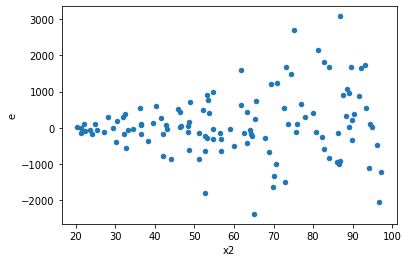

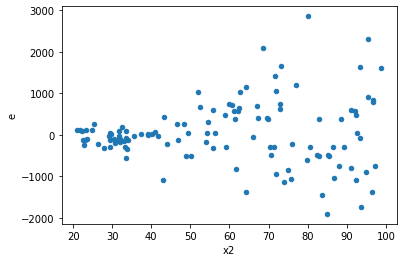

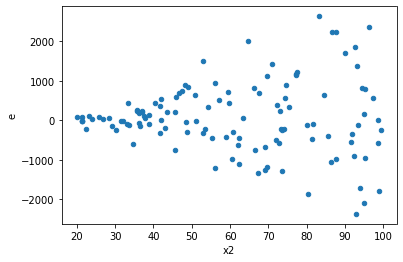

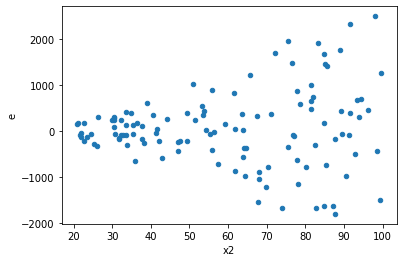

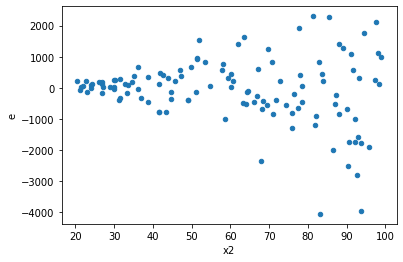

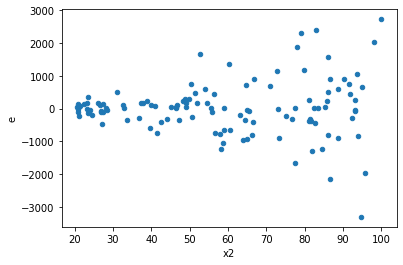

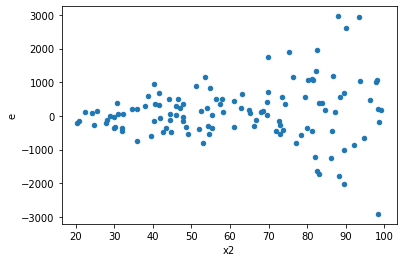

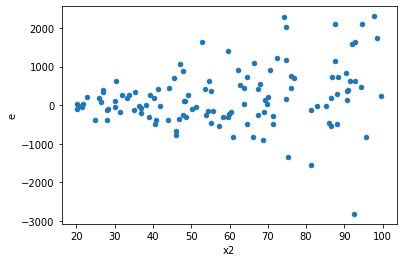

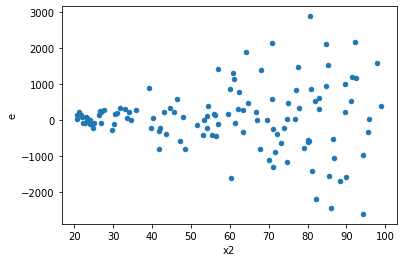

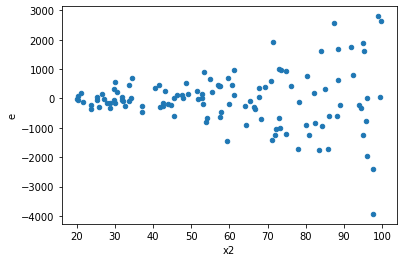

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,22764397.1451017,46594952.449250415,517372.662388675,1058976.1920284184,2.046834456113696,0.01939682291205913,0.9903015885439704,0.009698411456029565,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,12515896.143713653,29323561.486203954,284452.1850844012,666444.5792319081,2.3429054659367936,0.005653505845858664,0.9971732470770707,0.002826752922929332,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,9652409.142770415,44678451.250976056,219372.93506296398,1015419.3466130922,4.628735747742303,1.3285966031784113e-06,0.9999993357016984,6.642983015892057e-07,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,10500201.312498473,31597021.86391504,238640.93892041984,718114.1332707964,3.009182483606753,0.0003888489971062281,0.9998055755014469,0.00019442449855311406,Reject005=0 : Heteroscedasticity
10.0,44.0,44.0,9148785.777864598,52379835.09752984,207926.94949692267,1190450.7976711327,5.725331904072163,5.2401378791699926e-08,0.9999999737993106,2.6200689395849963e-08,Reject005=0 : Heteroscedasticity
11.0,44.0,44.0,10637767.269686371,34743522.821996495,241767.43794741752,789625.5186817385,3.2660540451004643,0.00014578757921679397,0.9999271062103916,7.289378960839699e-05,Reject005=0 : Heteroscedasticity
12.0,44.0,44.0,27686881.435812593,40483285.72918458,629247.3053593771,920074.675663286,1.4621829411534961,0.2115802198768042,0.8942098900615979,0.1057901099384021,Reject005=1 : Homoscedasticity
13.0,44.0,44.0,6713490.6228354955,42268132.28353906,152579.33233717034,960639.3700804331,6.295999303218924,1.1423001211596784e-08,0.9999999942884994,5.711500605798392e-09,Reject005=0 : Heteroscedasticity
15.0,44.0,44.0,15259706.189995417,56654270.742987625,346811.50431807764,1287597.062340628,3.712671137805481,2.8504012524077638e-05,0.999985747993738,1.4252006262038819e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,22764397.1451017,46594952.449250415,517372.662388675,1058976.1920284184,2.046834456113696,0.01939682291205913,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,12515896.143713653,29323561.486203954,284452.1850844012,666444.5792319081,2.3429054659367936,0.005653505845858664,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,45107505.586573005,17936561.27444125,1025170.5815130229,407649.11987366475,0.3976402827244866,0.0027885671060668598,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,42562490.019779846,12512877.273828395,967329.3186313602,284383.57440519077,0.29398837492856617,8.79976493008823e-05,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,34524092.06104155,32309332.438428905,784638.4559327625,734303.0099642933,0.9358488669681231,0.8269376499059155,Reject005=1 : Homoscedasticity
5.0,44.0,44.0,9652409.142770415,44678451.250976056,219372.93506296398,1015419.3466130922,4.628735747742303,1.3285966031784113e-06,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,10500201.312498473,31597021.86391504,238640.93892041984,718114.1332707964,3.009182483606753,0.0003888489971062281,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,36654160.31798051,22689416.124042265,833049.0981359207,515668.54827368783,0.6190133924009735,0.11541942125918607,Reject005=1 : Homoscedasticity
8.0,44.0,44.0,32409330.14030365,26546701.191718217,736575.6850069012,603334.1179935959,0.8191067534192947,0.5108521532404409,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    630
Reject005=1 : Homoscedasticity      370
Name: Result_test, dtype: int64